In [13]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
path='/opt/output/acdc/norm/1/3L/patient012/*.npy'
images=glob.glob(path)

In [10]:
type(images)

list

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


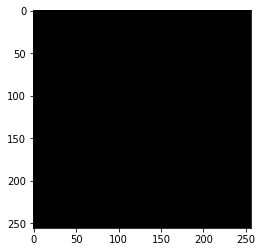

In [17]:
for i in images:
    im=np.load(i)
    print (np.min(im))
    plt.imshow(im, cmap="bone")

In [18]:
path1='/opt/output/acdc/norm/1/3/patient012/*label.*'

In [19]:
orig_image=glob.glob(path1)

/opt/output/acdc/norm/1/3/patient012/patient012_slice4_frame1_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice6_frame13_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice2_frame1_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice9_frame1_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice5_frame1_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice10_frame1_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice7_frame13_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice8_frame1_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice3_frame1_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice1_frame13_label.nii.npy
[1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice6_frame1_label.nii.npy
[0. 1.]
/opt/output/acdc/norm/1/3/patient012/patient012_slice10_frame13_label.nii.n

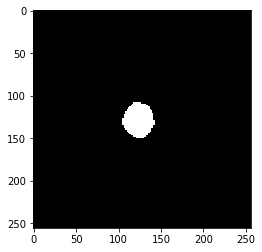

In [26]:
for i in orig_image:
    im=np.load(i)
    print (i)
    max_val=im.max()
    im[im<max_val]=0
    im[im==max_val]=1
    print(np.unique(im))
    plt.imshow(im, cmap="bone")

In [27]:
im_test='/opt/output/acdc/norm/1/3/patient012/patient012_slice1_frame13_label.nii.npy'

In [28]:
test_im=np.load(im_test)

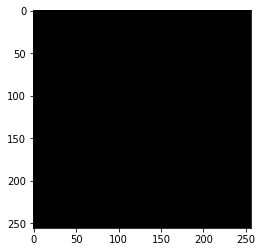

In [29]:
plt.imshow(test_im, cmap="bone")